In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Daily Demand Forecasting Orders(Ordens de Previsão de Demanda Diária)

### O banco de dados foi coletado durante 60 dias, este é um banco de dados real de uma empresa brasileira de grande logística. Doze atributos preditivos e um alvo que é o total de pedidos diários.


In [2]:
df = pd.read_csv("Daily_Demand_Forecasting_Orders.csv", sep = ";")

## Dicionário das Colunas

Aqui está um dicionário que inclui o nome original, o tipo de dado e a descrição de cada coluna:

| Nome Original                                     | Nome da Coluna                                   | Tipo do dado  | Descrição                                               |
|--------------------------------------------------|--------------------------------------------------|-------|---------------------------------------------------------|
| Week of the month (first week, second, third, fourth or fifth week) | Semana do mês (primeira semana, segunda, terceira, quarta ou quinta semana) | int | Refere-se à semana específica do mês (primeira, segunda, terceira, quarta ou quinta semana) |
| Day of the week (Monday to Friday)                | Dia da semana (segunda-feira a sexta-feira)      | int | Representa o dia da semana (segunda-feira a sexta-feira) |
| Non-urgent order                                  | Pedido não urgente                               | float | Indica a presença de um pedido que não é urgente         |
| Urgent order                                      | Pedido urgente                                    | float | Indica a presença de um pedido urgente                   |
| Order type A                                      | Tipo de pedido A                                 | float | Representa o tipo de pedido A                            |
| Order type B                                      | Tipo de pedido B                                 | float | Representa o tipo de pedido B                            |
| Order type C                                      | Tipo de pedido C                                 | float | Representa o tipo de pedido C                            |
| Fiscal sector orders                              | Pedidos do setor fiscal                           | float | Indica os pedidos provenientes do setor fiscal           |
| Orders from the traffic controller sector         | Pedidos do setor de controlador de tráfego        | int | Indica os pedidos provenientes do setor de controlador de tráfego |
| Banking orders (1)                                | Pedidos bancários (1)                            | int | Representa um tipo de pedido bancário (1)                |
| Banking orders (2)                                | Pedidos bancários (2)                            | int | Representa um tipo de pedido bancário (2)                |
| Banking orders (3)                                | Pedidos bancários (3)                            | int | Representa um tipo de pedido bancário (3)                |
| Target (Total orders)                             | Meta (Total de pedidos)                          | float | Representa a meta de total de pedidos                    |


### Comando **Head(15)** para exibir apenas as 15 primeiras linhas, tornando o DataFrame mais visivel para o começo da analise.

In [3]:
df.head(15)

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


### Comando Describe() para nos trazer dados Estatisticos descritivos do nosso DataFrame.

In [4]:
df.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


Uma breve interpretação geral das estatisticas descritivas usadas no comando describe().

1. **count**: O número de entradas não nulas para cada coluna.
2. **mean**: A média (média aritmética) dos valores em cada coluna.
3. **std**: O desvio padrão, que mede a dispersão dos valores em relação à média.
4. **min**: O valor mínimo encontrado em cada coluna.
5. **25%**: O primeiro quartil, que representa o valor abaixo do qual 25% dos dados estão.
6. **50%**: O segundo quartil (mediana), que representa o valor abaixo do qual 50% dos dados estão.
7. **75%**: O terceiro quartil, que representa o valor abaixo do qual 75% dos dados estão.
8. **max**: O valor máximo encontrado em cada coluna.

# Entendendo o comportamento dos pedidos diarios e semanais.

## Análise por Tipo de Pedido

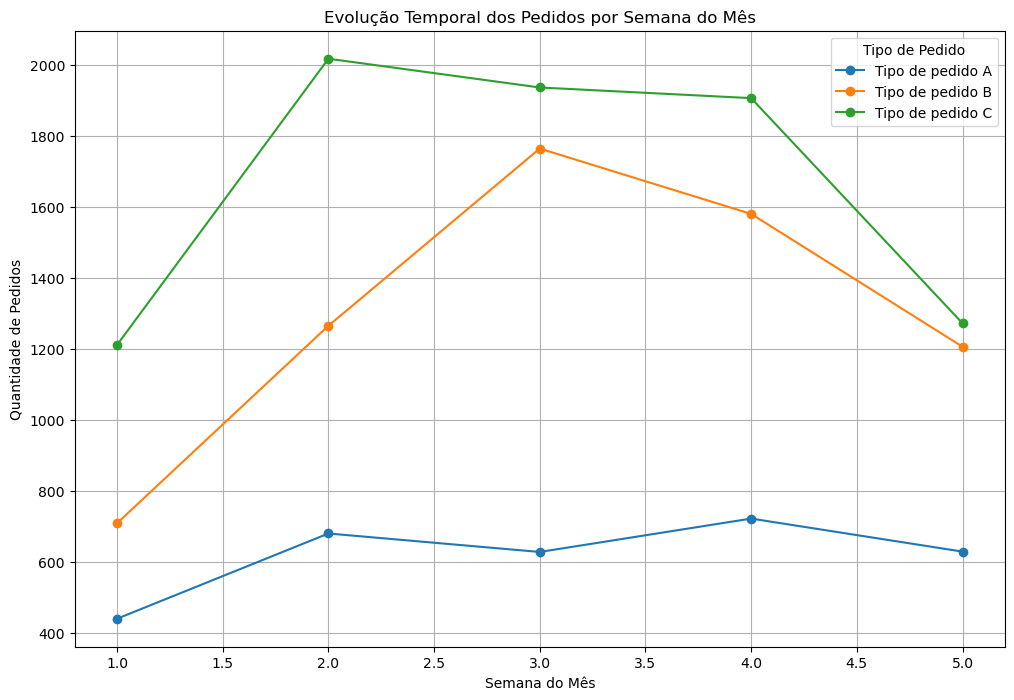

In [5]:
import matplotlib.pyplot as plt

# Convertendo as colunas 'Order type A', 'Order type B', 'Order type C' para inteiros
df[['Order type A', 'Order type B', 'Order type C']] = df[['Order type A', 'Order type B', 'Order type C']].astype(int)

# Agrupando por semana do mês e somando os pedidos de cada tipo
pedidos_por_semana = df.groupby('Week of the month (first week, second, third, fourth or fifth week')[['Order type A', 'Order type B', 'Order type C']].sum()

# Definindo manualmente os números do índice
numeros_do_indice = [1, 2, 3, 4, 5]

# Atribuindo os números do índice ao DataFrame
pedidos_por_semana.index = numeros_do_indice

# Criando um novo DataFrame com o índice definido manualmente
df_plot = pd.DataFrame(pedidos_por_semana.values, columns=['Tipo de pedido A', 'Tipo de pedido B', 'Tipo de pedido C'], index=pedidos_por_semana.index)

# Plotando o gráfico de linha temporal
df_plot.plot(kind='line', figsize=(12, 8), marker='o')  # Adicionando marcadores para destacar os pontos
plt.title('Evolução Temporal dos Pedidos por Semana do Mês')
plt.xlabel('Semana do Mês')
plt.ylabel('Quantidade de Pedidos')
plt.legend(title='Tipo de Pedido')
plt.grid(True)
plt.show()



### Vemos que a ordem de pedido mais solicitada é a "C", em sequencia a "B" e o menos solicitado "A".

### O grafico de linha acima está identificando um crescimento ate a teceira semana, conforme se aproxima do termino do mes, as ordens de pedidos caem consideravelmente. 

### O pedido C contem um pico ate a segunda semana, porem vemos uma queda no inicio da quarta semana. O pedido B cresce entre a primeira e terceira semana, em seguida há um declinio ate a quinta semana. 

### O pedido A mesmo sendo em menor numero se mantem constante com altos e baixos, crescimento ate segunda semana, com queda entre a segunda e terceira e novamente cresce ate a quarta semana e por fim cai igualmente aos demais pedidos conforme se aproxima do fim do mês.


## Analisaremos o total de pedidos por dia da semana e obter um grafico para visualizar.

In [6]:
# Comando abaixo para mostrar em numero o todal dos pedidos solicitados em cada semana.
#Groupby faz o agrupamento e o sum faz a somatoria deles.

df.groupby('Day of the week (Monday to Friday)')['Target (Total orders)'].sum()

Day of the week (Monday to Friday)
2    4292.364
3    3647.181
4    3665.064
5    3287.619
6    3160.171
Name: Target (Total orders), dtype: float64

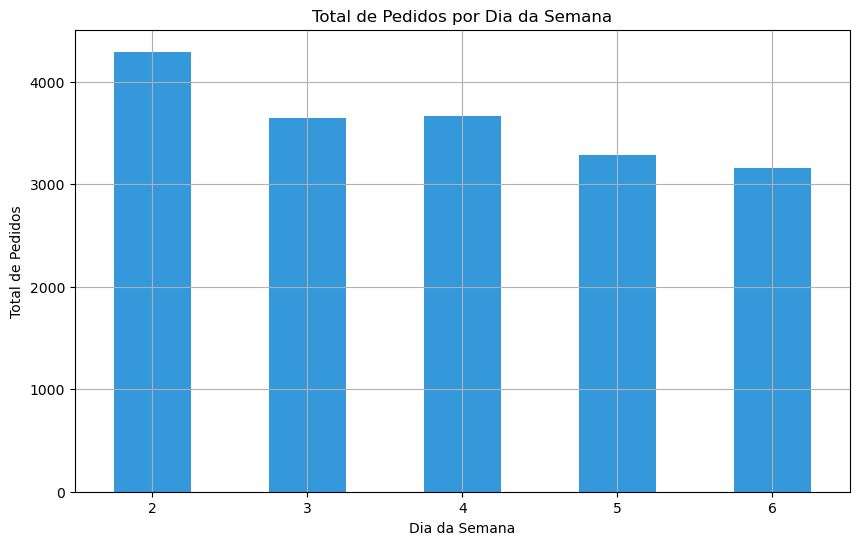

In [7]:
pedidos_por_dia = df.groupby('Day of the week (Monday to Friday)')['Target (Total orders)'].sum()

# Plotar Gráfico de Barras
fig, ax = plt.subplots(figsize=(10, 6))
pedidos_por_dia.plot(kind='bar', color='#3498db', ax=ax)  # Código de cor hexadecimais para um azul sólido
plt.title('Total de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=0)  # Rótulos na vertical
plt.grid(True)
plt.show()

### Legenda do "Dia da Semana"
- **2**: Segunda-feira
- **3**: Terça-feira
- **4**: Quarta-feira
- **5**: Quinta-feira
- **6**: Sexta-feira

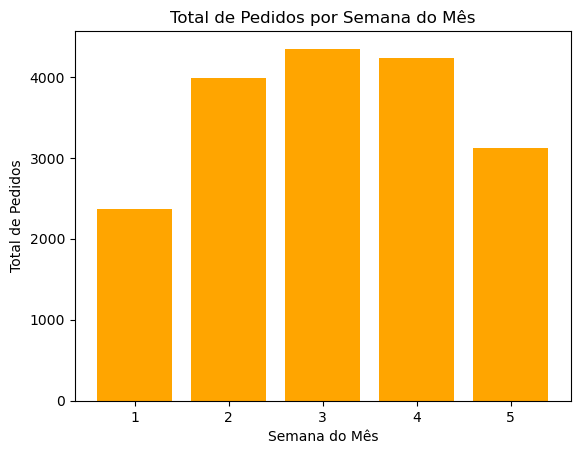

In [13]:
# Agrupar por 'Week' e calcular a soma para 'Target (Total orders)'
total_orders_por_semana = df.groupby('Week of the month (first week, second, third, fourth or fifth week')['Target (Total orders)'].sum()

# Cores diferentes para cada barra
cores = ['orange']

# Criar um histograma com barras coloridas
plt.bar(total_orders_por_semana.index, total_orders_por_semana, color=cores)

# Adicionar rótulos e título
plt.xlabel('Semana do Mês')
plt.ylabel('Total de Pedidos')
plt.title('Total de Pedidos por Semana do Mês')

# Exibir o gráfico
plt.show()

## Analisaremos os dados de "Pedido urgente" e "Pedido não urgente".

# Grafico de barras a seguir identificará à ocorrencia dos Pedido Urgente e Não Urgentes.

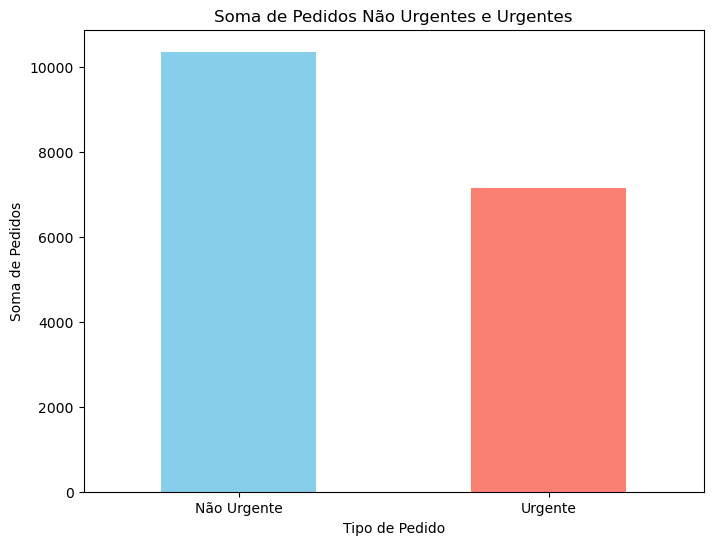

In [9]:
# Obtendo a contagem de 'Non-urgent order' e 'Urgent order'
contagem_pedidos = df[['Non-urgent order', 'Urgent order']].sum()

# Plotando o gráfico de barras
contagem_pedidos.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Soma de Pedidos Não Urgentes e Urgentes')
plt.xlabel('Tipo de Pedido')
plt.ylabel('Soma de Pedidos')
plt.xticks([0, 1], ['Não Urgente', 'Urgente'], rotation=0)
plt.show()

### Aqui separamos para visualizar as colunas de pedidos urgentes e não urgentes. Há menos pedidos urgente na somatoria total dos dados.

# Mapa de calor para identificar a correlação dos dados

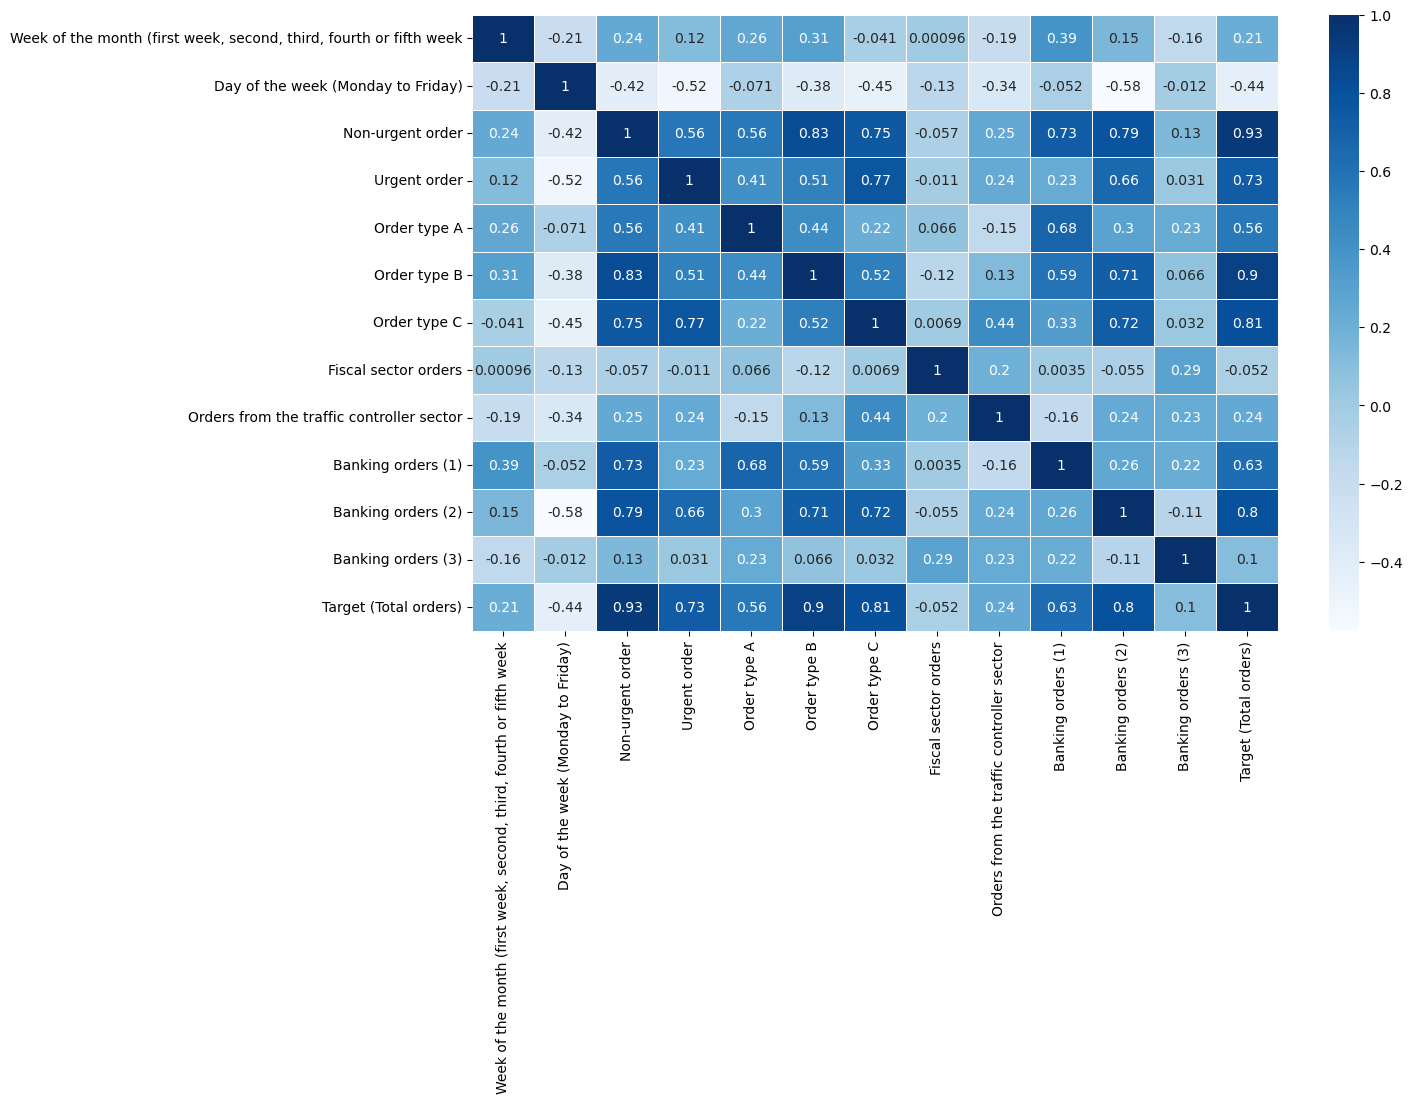

In [10]:
fig, ax = plt.subplots(figsize=(13,8))

_= sns.heatmap(df.corr(), cmap = 'Blues', linewidth = 0.4, annot = True)